<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/%E6%9C%80%E7%9F%ADPytorch/%EF%BC%95%E7%AB%A0%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5章線形回帰

In [1]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
# PyTorch関連ライブラリ
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [4]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=4)

In [5]:
#5.3線形関数（nn.Linear）
torch.manual_seed(123)

l1 = nn.Linear(1, 1)

print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [6]:
#named_parametersという関数を呼びだすと、（パラメータ名、パラメータ参照）のリストを返す
#パラメータ名、パラメータ値、shapeの表示

for param in l1.named_parameters():
  print('name: ', param[0])
  print('tensor: ', param[1])
  print('shape: ', param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [7]:
#初期値設定
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

#結果確認
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [8]:
#再度パラメータ表示の確認テスト
for param in l1.named_parameters():
  print('name: ', param[0])
  print('tensor: ', param[1])
  print('shape: ', param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[2.]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([1.], requires_grad=True)
shape:  torch.Size([1])


In [9]:
#テスト用ダミーデータをこの関数にかけて１次関数として動作していることを確認
x_np = np.arange(-2, 2.1, 1)
x = torch.tensor(x_np).float()
#サイズを(N,1)に変換
x = x.view(-1, 1)

print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [10]:
y = l1(x)
print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


In [11]:
#2入力１出力(重回帰のパターン)
l2 = nn.Linear(2, 1)

#初期値設定
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

#結果確認
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [12]:
x2_np = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])

x2 = torch.tensor(x2_np).float()

#結果確認
print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [13]:
y2 = l2(x2)

print(y2.shape)

print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


In [14]:
#2入力３出力
l3 = nn.Linear(2,3)

nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [15]:
y3 = l3(x2)

print(y3.shape)

print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


In [16]:
#カスタムクラスを利用したモデル定義

class Net(nn.Module):
  def __init__(self, n_input, n_output):
    #親クラスnn.Modulesの初期化呼び出し
    super().__init__()

    #出力層定義
    self.l1 = nn.Linear(n_input, n_output)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

In [17]:
#ダミー入力
inputs = torch.ones(100, 1)

n_input = 1
n_output = 1
net = Net(n_input, n_output)

outputs = net(inputs)

各実習で利用する損失関数
--------------------------------

MSELoss -> 平均２乗誤差

BCELoss -> 2値分類用交差エントロピー関数

CrossEntropyLoss -> 多値分類用交差エントロピー関数

**損失とは「予測関数」と「損失関数」の合成関数**


In [18]:
#学習用データの準備
from sklearn.datasets import load_boston

#データ読み込み
boston = load_boston()

x_org, yt = boston.data, boston.target

#項目名リスト取得
feature_names = boston.feature_names

#結果確認
print('元データ', x_org.shape, yt.shape)
print('項目名', feature_names)

元データ (506, 13) (506,)
項目名 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
#データの絞り込み（RMのみ）
x = x_org[:,feature_names == 'RM']
print('絞り込み後', x.shape)
print(x[:5,:])

#正解データyの表示
print('正解データ')
print(yt[:5])

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


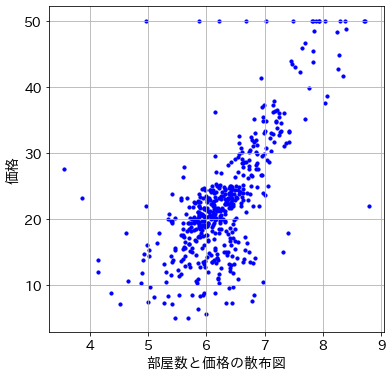

In [20]:
#散布図の表示
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.xlabel('部屋数と価格の散布図')
plt.show()

In [21]:
#モデル定義
n_input = x.shape[1]
n_output = 1

print(f'入力次元数: {n_input}  出力次元数: {n_output}')

入力次元数: 1  出力次元数: 1


In [22]:
#機械学習モデル（予測モデル）クラス定義
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)

    #初期値を全部１にする（書籍との条件揃えのため）
    nn.init.constant_(self.l1.weight, 1.0)
    nn.init.constant_(self.l1.bias, 1.0)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

In [23]:
net = Net(n_input, n_output)

In [24]:
for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1.]])
変数名: l1.bias
変数値: tensor([1.])


In [25]:
for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [26]:
#損失関数と最適化関数
#損失:平均２乗誤差
criterion = nn.MSELoss()

lr = 0.01

optimizer = optim.SGD(net.parameters(), lr=lr)

In [27]:
# 勾配降下法
# 繰り返し計算により最適なパラメータ値を見つけるためのアルゴリズム
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [28]:
#損失計算用にlabels変数を(N,1)次元の行列に変換する
labels1 = labels.view((-1,1))

print(labels1.shape)

torch.Size([506, 1])


In [29]:
# 予測計算
outputs = net(inputs)

In [30]:
# 損失計算(outputsとlabels1を引数に呼び出す)
loss = criterion(outputs, labels1)

#　損失値の取得
print(f'{loss.item():.5f}')

308.44986


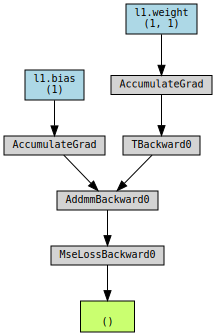

In [31]:
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [32]:
#　勾配計算（backward関数を呼び出すだけ）
outputs = net(inputs)

loss = criterion(outputs, labels1)
loss.backward()
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [33]:
#パラメータ修正
optimizer.step()

print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [34]:
#勾配値の初期化
optimizer.zero_grad()

print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[0.]])
tensor([0.])
